# Assignment 3

# MAS DSE200

## Instructions

* Please submit **both** the pdf and ipynb files.
* You don’t need to explain your approach (unless specified) so please be concise in your submission.
* To obtain full marks for a question, both the answer and the code should be correct. 
* Completely wrong (or missing) code with correct answer will result in zero marks. 
* Please code the solution in the space provided.

### Imports

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

### Preliminaries

Load the Formula1 cars data into a Pandas DataFrame called racecars_df.

In [2]:
racecars_df = pd.read_csv('./formula_one.csv', sep=',')

### 1. Inspect data
**Print the shape** of the racecars_df DataFrame. Then, **display the first 10 entries** in the racecars_df DataFrame to get an idea of what the columns are and what some values might look like.

In [3]:
print(racecars_df.shape)
racecars_df.head(10)

(1095, 6)


,number,max_car_speed,driver_weight,engine_power,fuel_efficiency,fuel_tank_capacity
0,0,232.863283,76.822000,918.060000,90.363605,36.160000
1,1,205.533324,74.403843,917.356829,90.065810,19.426597
2,2,258.100967,63.638000,923.058282,92.189710,14.460000
3,3,249.190045,74.138895,920.530173,95.494480,12.742547
4,4,236.863283,47.294000,921.196563,94.535457,76.740000
5,5,233.983375,79.404000,915.345704,88.678473,33.930000
6,6,239.589632,74.043304,915.653712,91.585075,21.385657
7,7,218.646212,54.710000,918.133985,90.441205,74.920000
8,8,246.883152,83.582000,920.153126,93.551053,24.030000
9,9,227.576604,51.498000,915.092267,89.763146,68.050000


### 2. Exploratory Analysis: Missing Data    
a) Please **report how many values are missing (null) in each column**.<br>

In [4]:
racecars_df.isnull().sum()

number                0
max_car_speed         4
driver_weight         5
engine_power          3
fuel_efficiency       3
fuel_tank_capacity    0
dtype: int64

b) **Update racecars_df DataFrame by removing all rows that have any missing values** <br>
Print the shape of the racecars_df DataFrame after the removal to confirm that the change took place.

In [5]:
print("Dimensions before removing null values: ", racecars_df.shape)

racecars_df.dropna(inplace=True)   # NOTE: Original racecars_df is overwritten
print("Dimensions after removing null values:  ", racecars_df.shape)

Dimensions before removing null values:  (1095, 6)
Dimensions after removing null values:   (1083, 6)


### 3. Engine powers of different cars

Let's see what how the engine powers have evolved for the cars that have raced on this track. <br><br>
3a) **Plot all the engine powers corresponding to the different cars**
<ul>
    <li>The x-axis is the car number(number column)</li>
    <li>The y-axis is the engine power</li>
    <li>Use either a scatter or line plot</li>
    <li>Label <b>both</b> axes appropriately</li> 
    <li>Add an appropriate title</li>
</ul>

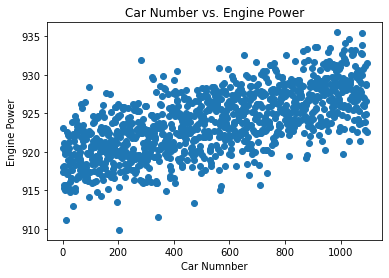

In [6]:
plt.scatter(x=racecars_df['number'], y=racecars_df['engine_power'])
plt.title('Car Number vs. Engine Power')
plt.xlabel('Car Numnber')
plt.ylabel('Engine Power')
plt.show()

3b) **Repeat part a**, but do it only for the **first 20 cars** in the dataset.<br>
**Make sure that the values appearing on the x-axis are integers.**(Check out the documentation of plt.xticks.)

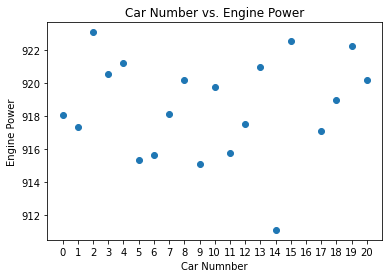

In [7]:
new_racecars_df = racecars_df.head(20)

plt.scatter(x=new_racecars_df['number'], y=new_racecars_df['engine_power'])
plt.title('Car Number vs. Engine Power')
plt.xlabel('Car Numnber')
plt.ylabel('Engine Power')
plt.xticks(np.arange(0, 21))
plt.show()

### 4.  Max Speed

**How many cars** achieved maximum speed over 220 during their races? **What percentage** (up to 2 decimal places) of the total samples does this make up?

In [8]:
cars = len(racecars_df[racecars_df.max_car_speed>220])
print(cars, 'cars achieved maximum speed over 220 during their races.')

percentage = cars/len(racecars_df)*100
round_percentage = "%.2f" % round(percentage,2)
print ("This makes up {}% of the total sample.".format(round_percentage))

783 cars achieved maximum speed over 220 during their races.
This makes up 72.30% of the total sample.


### 5. Driver weight distribution

Build a histogram using all the driver weights from the dataset. 

The x-axis should have 10 bins (ranges that the driver weights fall into, also called buckets). To be explicit, if you give pyplot your list of driver weights and 10 bins to put them in, your x-axis should look like this: [40,50,60,70,80,90,100].


<ul>
    <li>The x-axis is the driver weight</li>
    <li>The y-axis is the frequency</li>
    <li>Label <b>both</b> axes appropriately</li> 
    <li>Add an appropriate title</li>
</ul>

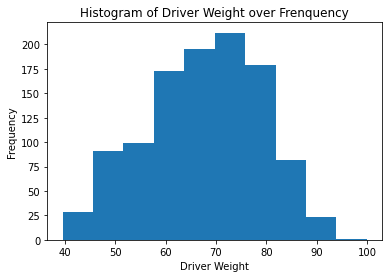

In [9]:
plt.hist(racecars_df['driver_weight'], bins=10)
plt.title("Histogram of Driver Weight over Frenquency")
plt.xlabel("Driver Weight")
plt.ylabel("Frequency")
plt.show()

### 6. Engine Power vs Fuel efficiency
**6a)** **Plot** the engine power vs fuel efficiency. 

<ul>
    <li>The x-axis is the engine power</li>
    <li>The y-axis is the fuel efficiency</li>
    <li>Use a scatter plot</li>
    <li>Label <b>both</b> axes appropriately</li> 
    <li>Add an appropriate title</li>
</ul>

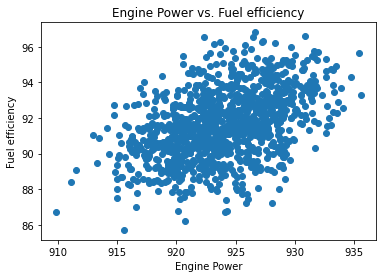

In [10]:
plt.scatter(x=racecars_df['engine_power'], y=racecars_df['fuel_efficiency'])
plt.title('Engine Power vs. Fuel efficiency')
plt.xlabel('Engine Power')
plt.ylabel('Fuel efficiency')
plt.show()

**6b)** **Calculate the correlation coefficients** of the same columns you plotted in part a.

In [11]:
np.corrcoef(racecars_df['engine_power'],racecars_df['fuel_efficiency'])

array([[1.        , 0.44694707],
       [0.44694707, 1.        ]])

**6c)** In the markdown cell below, **write a couple sentences** that describe the relationship between engine power and fuel efficiency in this dataset. Talk about things like:
<ul>
    <li>Are they correlated?</li>
    <li>Positively or negatively?</li>
    <li>Is this correlation strong or weak?</li>
</ul>

*Respond here*




In [12]:
print('Yes, they are correlated.')
print('Positively.')
print('This correlation is weak.')

Yes, they are correlated.
Positively.
This correlation is weak.
